In [105]:
import sys
sys.path.append("../")
from src.pairwise_evaluator import Pairwise_evaluator
import matplotlib.pyplot as plt
import numpy as np

In [106]:
n = 121
fname = "full-images-unlabeled-0"
dir = f"../data/OUTPUT_mod/data/full_sample_sizes/6000/3/{fname}"

data_all = np.loadtxt(f"{dir}/{fname}_sep.dat",dtype=int)
data_all

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [1, 1, 1, ..., 1, 1, 1],
       [0, 0, 0, ..., 0, 0, 0]])

In [107]:
# joined_rows = [''.join(row) for row in data_all.astype(str).tolist()]
# len(joined_rows)

In [108]:
eval_mod = Pairwise_evaluator(f"{dir}/{fname}_sep-output-out.j",121)
eval_mod.load_ising_paramters()
# do state probability in data training set vs energy
E = np.apply_along_axis(eval_mod.calc_energy,1,data_all)

In [109]:
u, v = np.unique(data_all, return_counts=True, axis=0)
E = np.apply_along_axis(eval_mod.calc_energy,1,u)

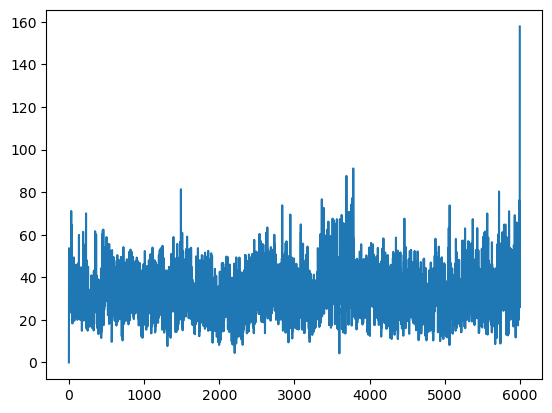

In [110]:
# plt.scatter(E/np.sum(E), v)
plt.plot(E)

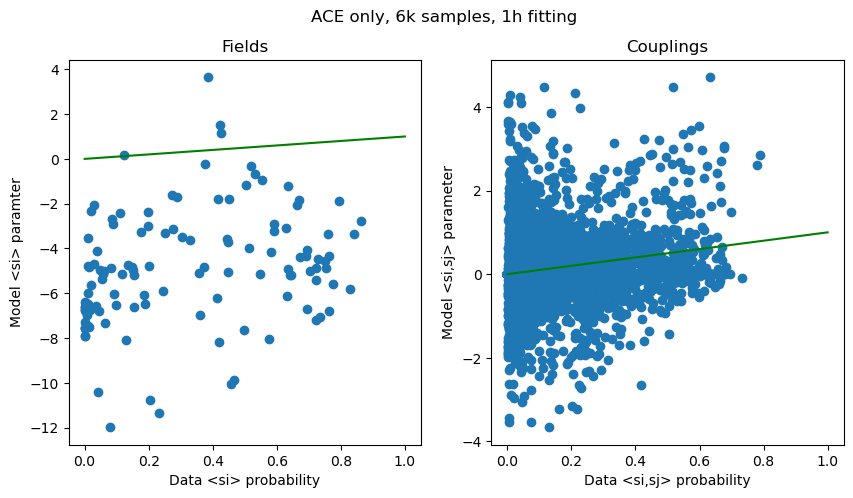

In [111]:

model_all = np.loadtxt(f"{dir}/{fname}_sep-output-out.j",dtype=np.double)
model_si = model_all[:n]
model_sij = model_all[n:]
# since cant calculate real probabilities for si and sij, compute un-normalized energy instead
data_all = np.loadtxt(f"{dir}/{fname}_sep-output.p",dtype=np.double)
data_si = data_all[:n]
data_sij = data_all[n:]


data_si.shape, data_sij.shape, model_si.shape, model_sij.shape



fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# for ax in axs:
#     ax.set_aspect('equal', 'box')
ax = axs[0]
ax.set_title("Fields")

ax.scatter(data_si, model_si,marker="o")
# ax.scatter(data_si, model_si,marker="o")

ax.set_xlabel('Data <si> probability')
ax.set_ylabel('Model <si> paramter')

ax = axs[1]
ax.scatter(data_sij, model_sij,marker="o")
ax.set_xlabel('Data <si,sj> probability')
ax.set_ylabel('Model <si,sj> parameter')

for ax in axs:
    # ax.set_xlim(0, 1)
    # ax.set_ylim(0, 1)
    ax.plot([0, 1], [0, 1], color='green') 
ax.set_title("Couplings")

fig.suptitle("ACE only, 6k samples, 1h fitting")

plt.show()


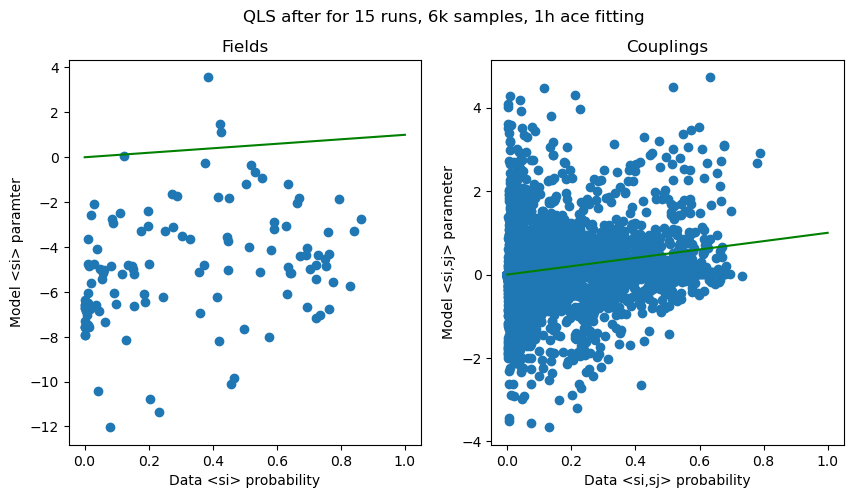

In [112]:

model_all = np.loadtxt(f"{dir}/{fname}_sep-output-out-fit.j",dtype=np.double)
model_si = model_all[:n]
model_sij = model_all[n:]
# since cant calculate real probabilities for si and sij, compute un-normalized energy instead
data_all = np.loadtxt(f"{dir}/{fname}_sep-output.p",dtype=np.double)
data_si = data_all[:n]
data_sij = data_all[n:]


data_si.shape, data_sij.shape, model_si.shape, model_sij.shape



fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# for ax in axs:
#     ax.set_aspect('equal', 'box')
ax = axs[0]
ax.set_title("Fields")

ax.scatter(data_si, model_si,marker="o")
# ax.scatter(data_si, model_si,marker="o")

ax.set_xlabel('Data <si> probability')
ax.set_ylabel('Model <si> paramter')

ax = axs[1]
ax.scatter(data_sij, model_sij,marker="o")
ax.set_xlabel('Data <si,sj> probability')
ax.set_ylabel('Model <si,sj> parameter')

for ax in axs:
    # ax.set_xlim(0, 1)
    # ax.set_ylim(0, 1)
    ax.plot([0, 1], [0, 1], color='green') 
ax.set_title("Couplings")

fig.suptitle("QLS after for 15 runs, 6k samples, 1h ace fitting")

plt.show()


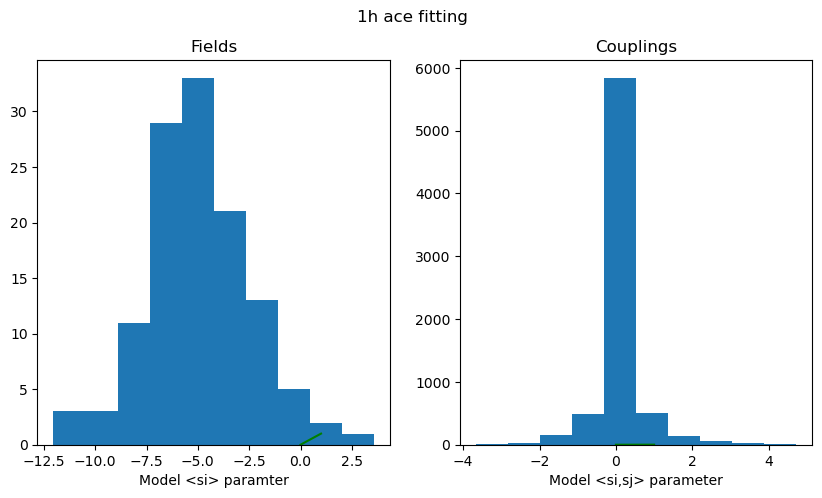

In [115]:
# model_all = np.loadtxt(f"{dir}/{fname}_sep-output-out.j",dtype=np.double)

model_all = np.loadtxt(f"{dir}/{fname}_sep-output-out-fit.j",dtype=np.double)
model_si = model_all[:n]
model_sij = model_all[n:]
# since cant calculate real probabilities for si and sij, compute un-normalized energy instead
data_all = np.loadtxt(f"{dir}/{fname}_sep-output.p",dtype=np.double)
data_si = data_all[:n]
data_sij = data_all[n:]


data_si.shape, data_sij.shape, model_si.shape, model_sij.shape



fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# for ax in axs:
#     ax.set_aspect('equal', 'box')
ax = axs[0]
ax.set_title("Fields")

ax.hist(model_si)
# ax.scatter(data_si, model_si,marker="o")

# ax.set_xlabel('Data <si> probability')
ax.set_xlabel('Model <si> paramter')

ax = axs[1]
ax.hist(model_sij)
# ax.set_ylabel('Data <si,sj> probability')
ax.set_xlabel('Model <si,sj> parameter')

for ax in axs:
    # ax.set_xlim(0, 1)
    # ax.set_ylim(0, 1)
    ax.plot([0, 1], [0, 1], color='green') 
ax.set_title("Couplings")

# fig.suptitle("QLS after for 15 runs, 6k samples, 1h ace fitting")
fig.suptitle("1h ace fitting")

plt.show()
